# Data Visualization with Python

#### Mert Hüseyin UZAN
#### Dataset:  WNBA Player Stats Season 2016-2017
#### Dataset url: https://www.kaggle.com/jinxbe/wnba-player-stats-2017

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure, output_file, show
df = pd.read_csv('WNBA.csv')
df.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,OREB,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,6,22,28,12,3,6,12,93,0,0
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,19,82,101,72,63,13,40,217,0,0
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,4,36,40,78,22,3,24,218,0,0
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,35,134,169,65,20,10,38,188,2,0
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,3,9,12,12,7,0,14,50,0,0


#### Problem 1: Average height by team

Team
ATL    185.727273
CHI    185.500000
CON    184.750000
DAL    186.583333
IND    184.083333
LA     185.833333
MIN    183.090909
NY     183.166667
PHO    185.583333
SAN    183.461538
SEA    184.333333
WAS    182.750000
Name: Height, dtype: float64


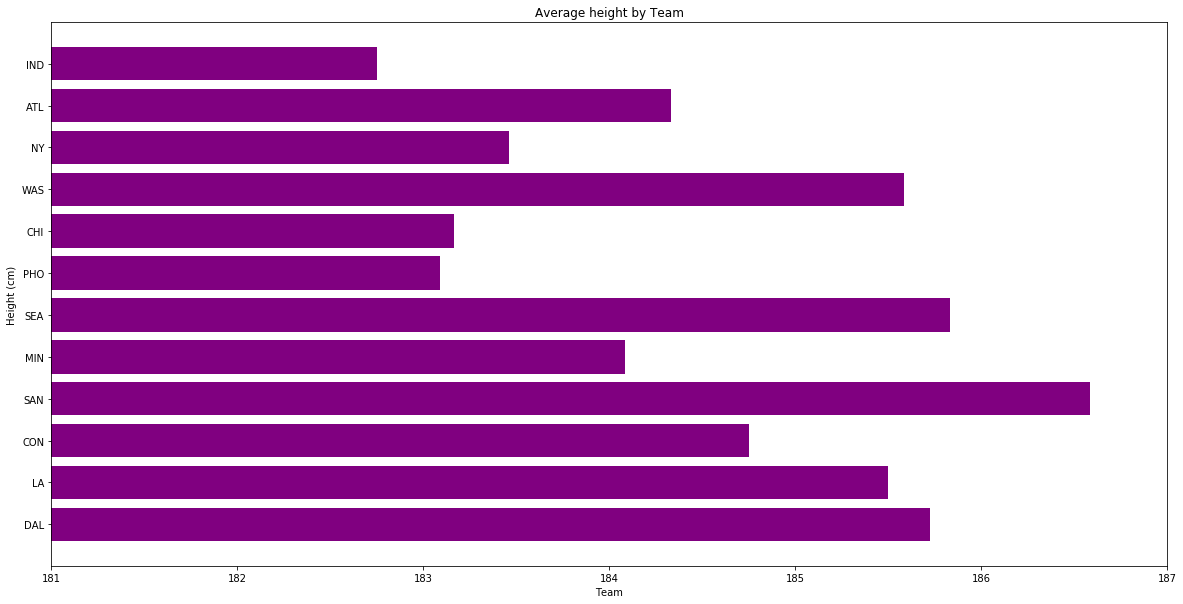

In [2]:
df_mean_by_team=df.groupby(['Team']).mean()
dfteam=df['Team'].unique()
print(df_mean_by_team['Height'])
plt.figure(figsize=(20,10))
plt.barh(dfteam,df_mean_by_team['Height'],color='purple')
plt.title("Average height by Team")
plt.xlabel("Team")
plt.ylabel("Height (cm)")
plt.xlim(181,187)
plt.show()

#### Problem 2: Total points by Team

Team
ATL    2451
CHI    2379
CON    2554
DAL    2039
IND    2645
LA     2423
MIN    2871
NY     2124
PHO    2594
SAN    2153
SEA    2310
WAS    2313
Name: PTS, dtype: int64


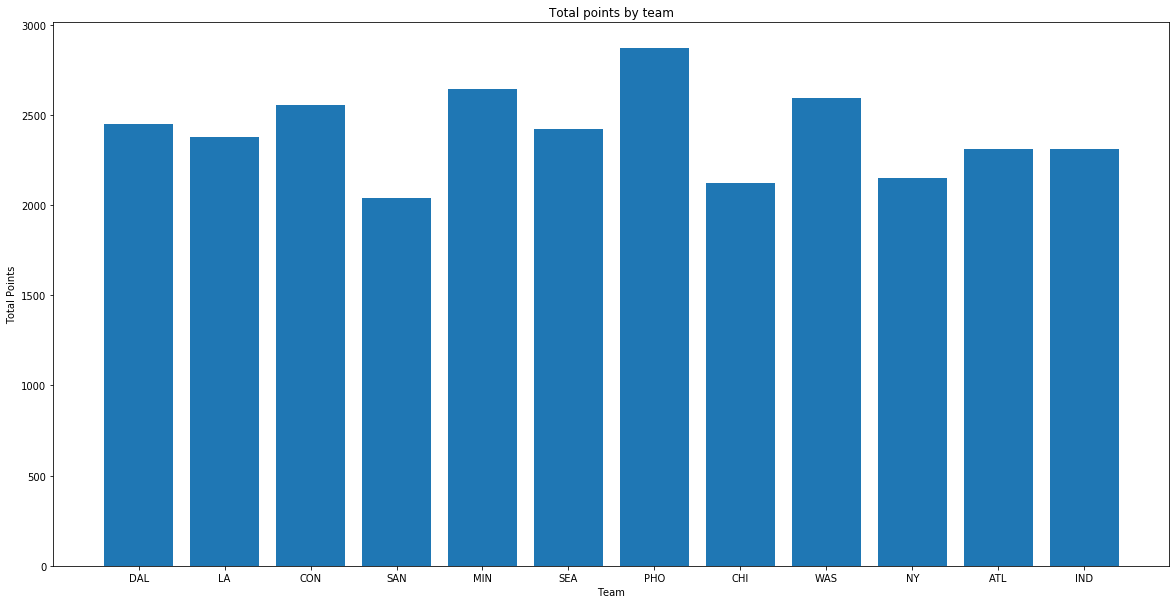

In [3]:
df_sum_by_team=df.groupby(['Team']).sum()
plt.figure(figsize=(20,10))
print(df_sum_by_team['PTS'])
plt.bar(dfteam,df_sum_by_team['PTS'])
plt.title("Total points by team")
plt.xlabel("Team")
plt.ylabel("Total Points")
plt.show()

#### Problem 3: Total 3-point made by Position

Pos
C       121
F       413
F/C     146
G      1201
G/F     225
Name: 15:00, dtype: int64


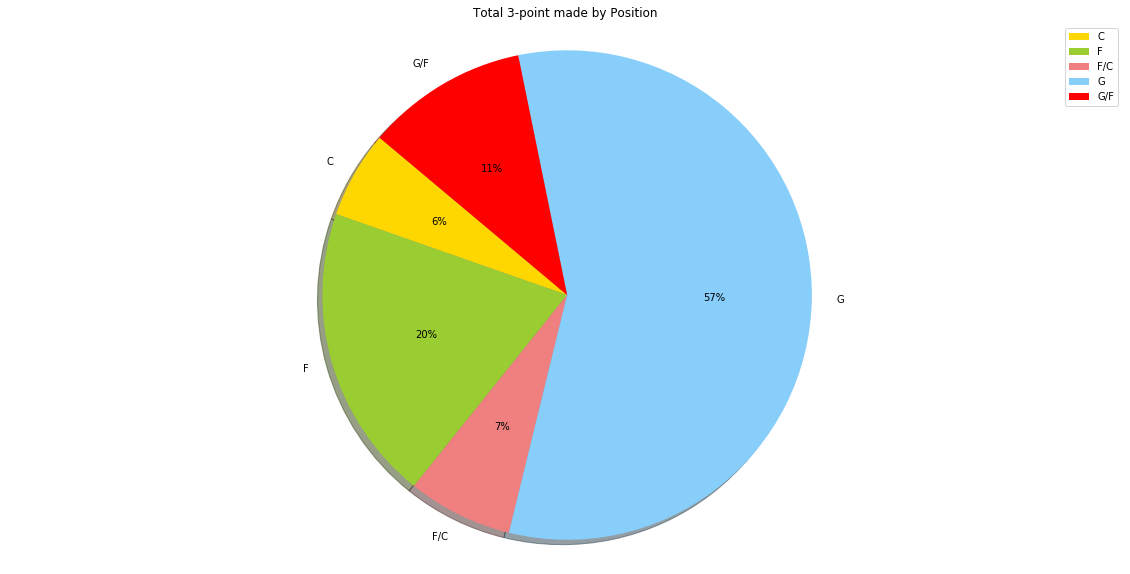

In [4]:
sort_by_pos = df.sort_values(by='Pos')
labels=sort_by_pos['Pos'].unique()
df_sum_by_pos=df.groupby(['Pos']).sum()
sizes = df_sum_by_pos["15:00"] #3PM yani atılan üçlük sayısının olduğu kolonun adı 15:00 şeklinde kaggledaki datada
print(sizes)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red']

plt.figure(figsize=(20,10))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.0f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Total 3-point made by Position')
plt.legend()
plt.show()

#### Problem 4: Average assists by Guard (G) players of the Teams

   Team        AST
0   ATL  82.600000
1   CHI  94.500000
2   CON  69.000000
3   DAL  62.750000
4   IND  53.166667
5    LA  60.250000
6   MIN  75.250000
7    NY  45.000000
8   PHO  55.166667
9   SAN  54.800000
10  SEA  67.200000
11  WAS  49.142857


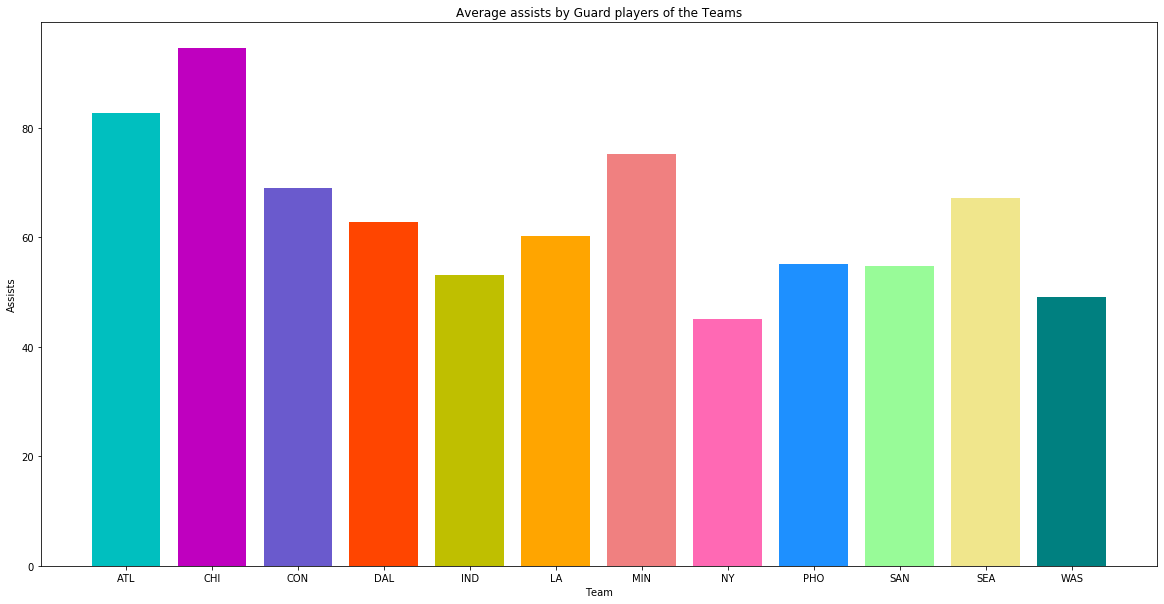

In [5]:
avg_by_team = df[(df.Pos == 'G')].groupby('Team').AST.mean().to_frame().reset_index()
Team = avg_by_team['Team'].tolist()
AST = avg_by_team['AST'].tolist()
print(avg_by_team[['Team','AST']])
plt.figure(figsize=(20,10))
colors=['c','m','slateblue','orangered','y','orange','lightcoral','hotpink','dodgerblue','palegreen','khaki','teal']
plt.bar(Team,AST,color=colors)
plt.title("Average assists by Guard players of the Teams")
plt.xlabel("Team")
plt.ylabel("Assists")
plt.show()

#### Problem 5: Average age by Team

Team
ATL    26.909091
CHI    26.666667
CON    25.000000
DAL    24.666667
IND    28.000000
LA     28.500000
MIN    30.545455
NY     26.000000
PHO    28.500000
SAN    26.692308
SEA    27.083333
WAS    26.666667
Name: Age, dtype: float64


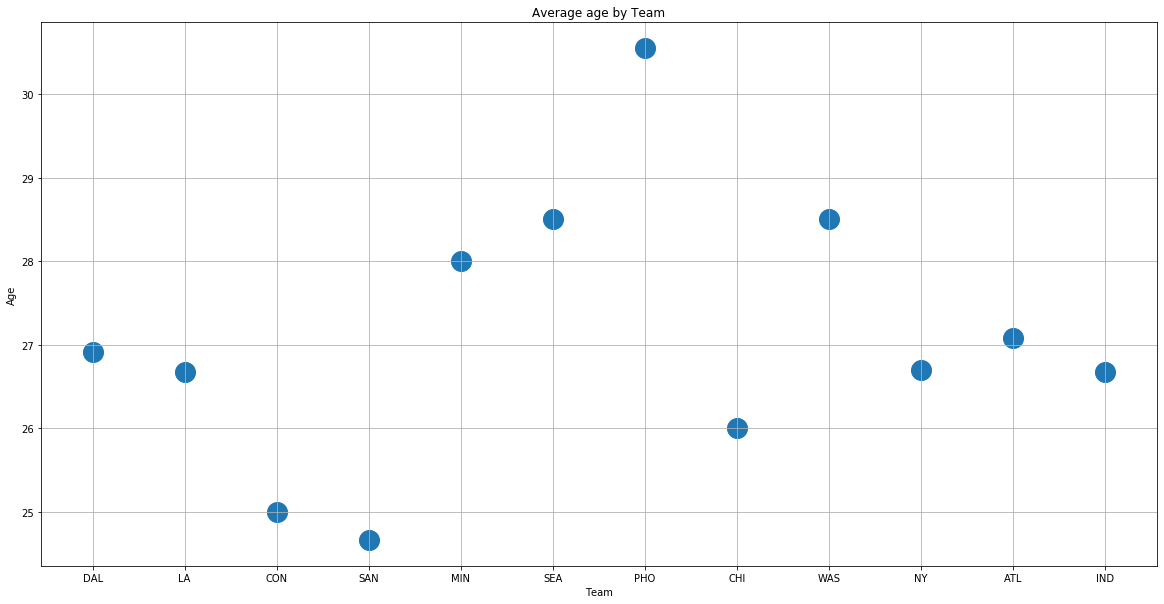

In [6]:
df_mean_by_team=df.groupby(['Team']).mean()
dfteam=df['Team'].unique()
print(df_mean_by_team['Age'])
plt.figure(figsize=(20,10))
plt.scatter(dfteam,df_mean_by_team['Age'],s=400)
plt.grid()
plt.title("Average age by Team")
plt.xlabel("Team")
plt.ylabel("Age")
plt.show()

#### Problem 6: Average turnover by Age

    Age         TO
0    21  11.500000
1    22  28.700000
2    23  24.200000
3    24  32.000000
4    25  28.266667
5    26  33.666667
6    27  38.000000
7    28  31.928571
8    29  26.125000
9    30  35.888889
10   31  30.000000
11   32  35.000000
12   33  38.333333
13   34  42.600000
14   35  49.500000
15   36  57.000000


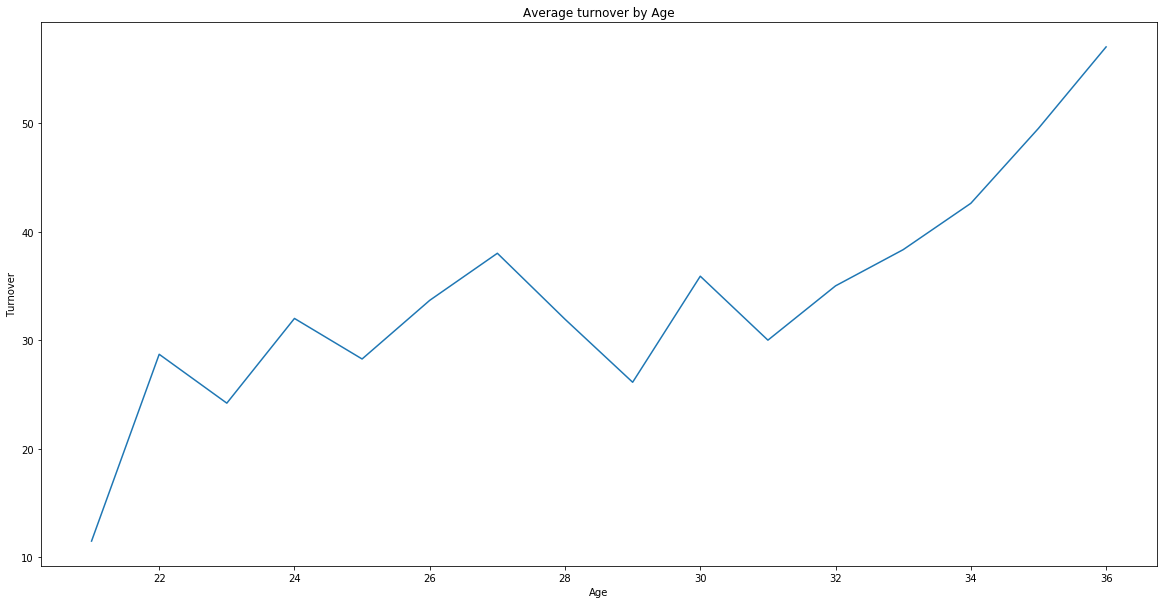

In [7]:
avg_by_age = df.groupby('Age').TO.mean().to_frame().reset_index()
print(avg_by_age[['Age','TO']])
Age = avg_by_age['Age'].tolist()
TO = avg_by_age['TO'].tolist()
plt.figure(figsize=(20,10))
plt.plot(Age,TO)
plt.title("Average turnover by Age")
plt.xlabel("Age")
plt.ylabel("Turnover")
plt.show()

#### Problem 7: Number of players by Position

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64


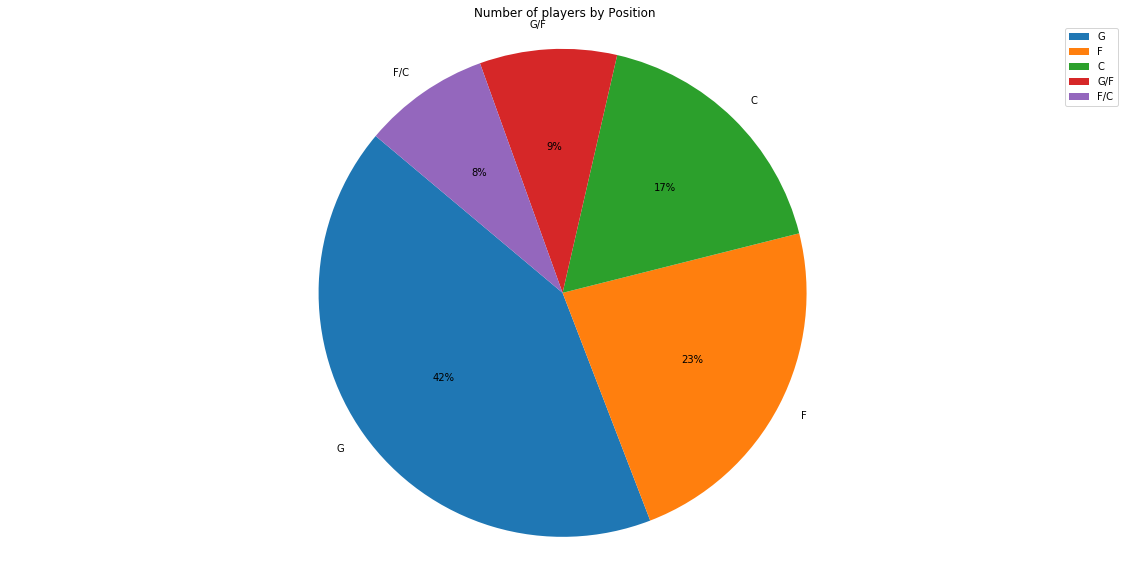

In [8]:
sizes =df['Pos'].value_counts(sort=True, ascending=False)
print(sizes)
plt.figure(figsize=(20,10))
plt.pie(sizes,labels=sizes.index.values, autopct='%1.0f%%', shadow=False, startangle=140)
plt.axis('equal')
plt.legend()
plt.title('Number of players by Position')
plt.show()

#### Problem 8: Total points and total assists by Team

   Team   PTS  AST
0   ATL  2451  559
1   CHI  2379  562
2   CON  2554  571
3   DAL  2039  364
4   IND  2645  518
5    LA  2423  535
6   MIN  2871  652
7    NY  2124  412
8   PHO  2594  554
9   SAN  2153  547
10  SEA  2310  546
11  WAS  2313  505


<Figure size 1080x1152 with 0 Axes>

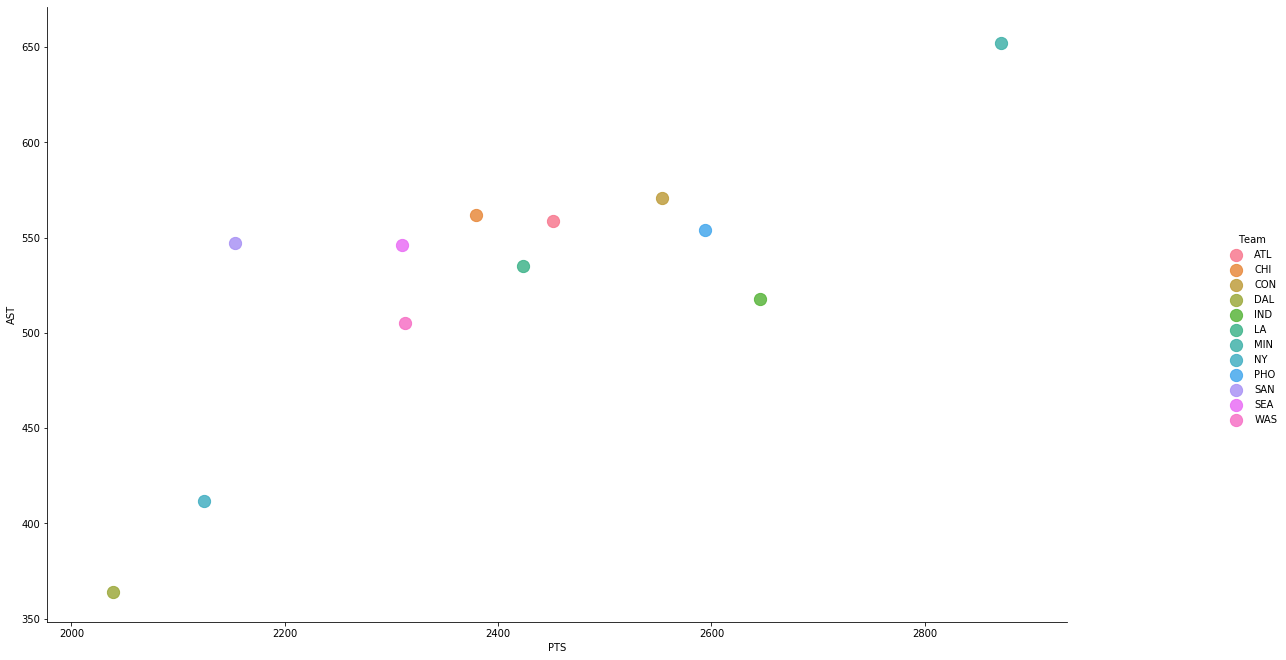

In [9]:
df_mean_by_team=df.groupby(['Team']).sum()
dfteam=df['Team'].unique()
df_mean_by_team=df_mean_by_team.reset_index()
print(df_mean_by_team[['Team','PTS','AST']])
plt.figure(figsize=(15,16))
g=sns.lmplot(x='PTS', y='AST', data=df_mean_by_team,
           fit_reg=False,
           hue='Team',scatter_kws={"s": 150})
g.fig.set_figwidth(20)
g.fig.set_figheight(10)

#### Problem 9: Age and total points density map

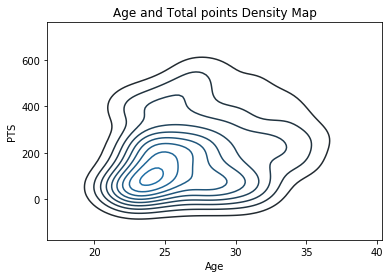

In [10]:
sns.kdeplot(df['Age'], df['PTS'])
plt.title("Age and Total points Density Map")
plt.show()

#### Problem 10: Average number of games played by age

In [11]:
p4 = df.groupby('Age')['Games Played'].mean().to_frame().reset_index()
x = p4['Age'].tolist()
y = p4['Games Played'].tolist()

p = figure(title="Average number of games played by age", x_axis_label='Age', y_axis_label='Games Played')

p.line(x=x, y=y, line_width=5, line_color="purple", line_dash="2 2")

show(p)